In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as api
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# OXY -- Occidental Petroleum Corporation

data = api.DataReader('OXY', data_source = 'yahoo', start = '2019-11-30', end = '2022-10-31')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,39.160000,38.410000,38.840000,38.680000,10829600.0,36.424664
2019-12-03,38.439999,37.540001,38.380001,38.020000,11535400.0,35.803146
2019-12-04,38.790001,38.169998,38.340000,38.450001,10537700.0,36.208076
2019-12-05,38.799999,37.779999,38.680000,37.980000,9214900.0,35.765476
2019-12-06,39.029999,38.099998,38.110001,39.009998,10411500.0,36.735416
...,...,...,...,...,...,...
2022-10-25,71.570000,70.209999,70.820000,71.089996,12413500.0,71.089996
2022-10-26,73.290001,71.500000,71.599998,72.519997,12722000.0,72.519997
2022-10-27,74.169998,71.760002,73.589996,71.870003,12754100.0,71.870003


In [4]:
# Reindexing

data = data.reindex(columns = ['High', 'Low', 'Open', 'Volume', 'Adj Close','Close'])
data

,High,Low,Open,Volume,Adj Close,Close
Date,,,,,,
2019-12-02,39.160000,38.410000,38.840000,10829600.0,36.424664,38.680000
2019-12-03,38.439999,37.540001,38.380001,11535400.0,35.803146,38.020000
2019-12-04,38.790001,38.169998,38.340000,10537700.0,36.208076,38.450001
2019-12-05,38.799999,37.779999,38.680000,9214900.0,35.765476,37.980000
2019-12-06,39.029999,38.099998,38.110001,10411500.0,36.735416,39.009998
...,...,...,...,...,...,...
2022-10-25,71.570000,70.209999,70.820000,12413500.0,71.089996,71.089996
2022-10-26,73.290001,71.500000,71.599998,12722000.0,72.519997,72.519997
2022-10-27,74.169998,71.760002,73.589996,12754100.0,71.870003,71.870003


In [5]:
# Saving dataset into a csv file

data.to_csv('OXY.csv')

In [6]:
stock_data = pd.read_csv('OXY.csv')
stock_data.head()

,Date,High,Low,Open,Volume,Adj Close,Close
0,2019-12-02,39.160000,38.410000,38.840000,10829600.0,36.424664,38.680000
1,2019-12-03,38.439999,37.540001,38.380001,11535400.0,35.803146,38.020000
2,2019-12-04,38.790001,38.169998,38.340000,10537700.0,36.208076,38.450001
3,2019-12-05,38.799999,37.779999,38.680000,9214900.0,35.765476,37.980000
4,2019-12-06,39.029999,38.099998,38.110001,10411500.0,36.735416,39.009998


In [7]:
# Correlation between variables

corr_matrix = stock_data.corr()
corr_matrix

/var/folders/f_/6ckdv_lx0vs3v3__lfst9tc40000gn/T/ipykernel_65370/1128190111.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stock_data.corr()


,High,Low,Open,Volume,Adj Close,Close
High,1.000000,0.998810,0.998968,-0.058031,0.999024,0.999166
Low,0.998810,1.000000,0.999101,-0.091626,0.998602,0.999022
Open,0.998968,0.999101,1.000000,-0.078983,0.997615,0.997950
Volume,-0.058031,-0.091626,-0.078983,1.000000,-0.063874,-0.069727
Adj Close,0.999024,0.998602,0.997615,-0.063874,1.000000,0.999730
Close,0.999166,0.999022,0.997950,-0.069727,0.999730,1.000000


<AxesSubplot: >

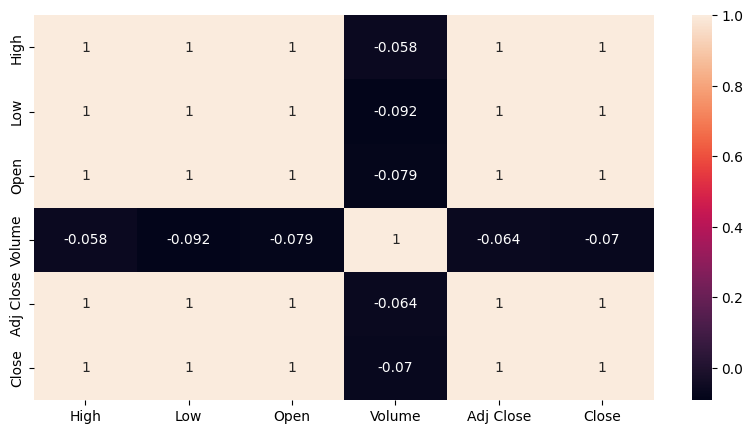

In [8]:
# Correlation heatmap

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)

In [9]:
# Checking for missing values
stock_data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Volume       0
Adj Close    0
Close        0
dtype: int64

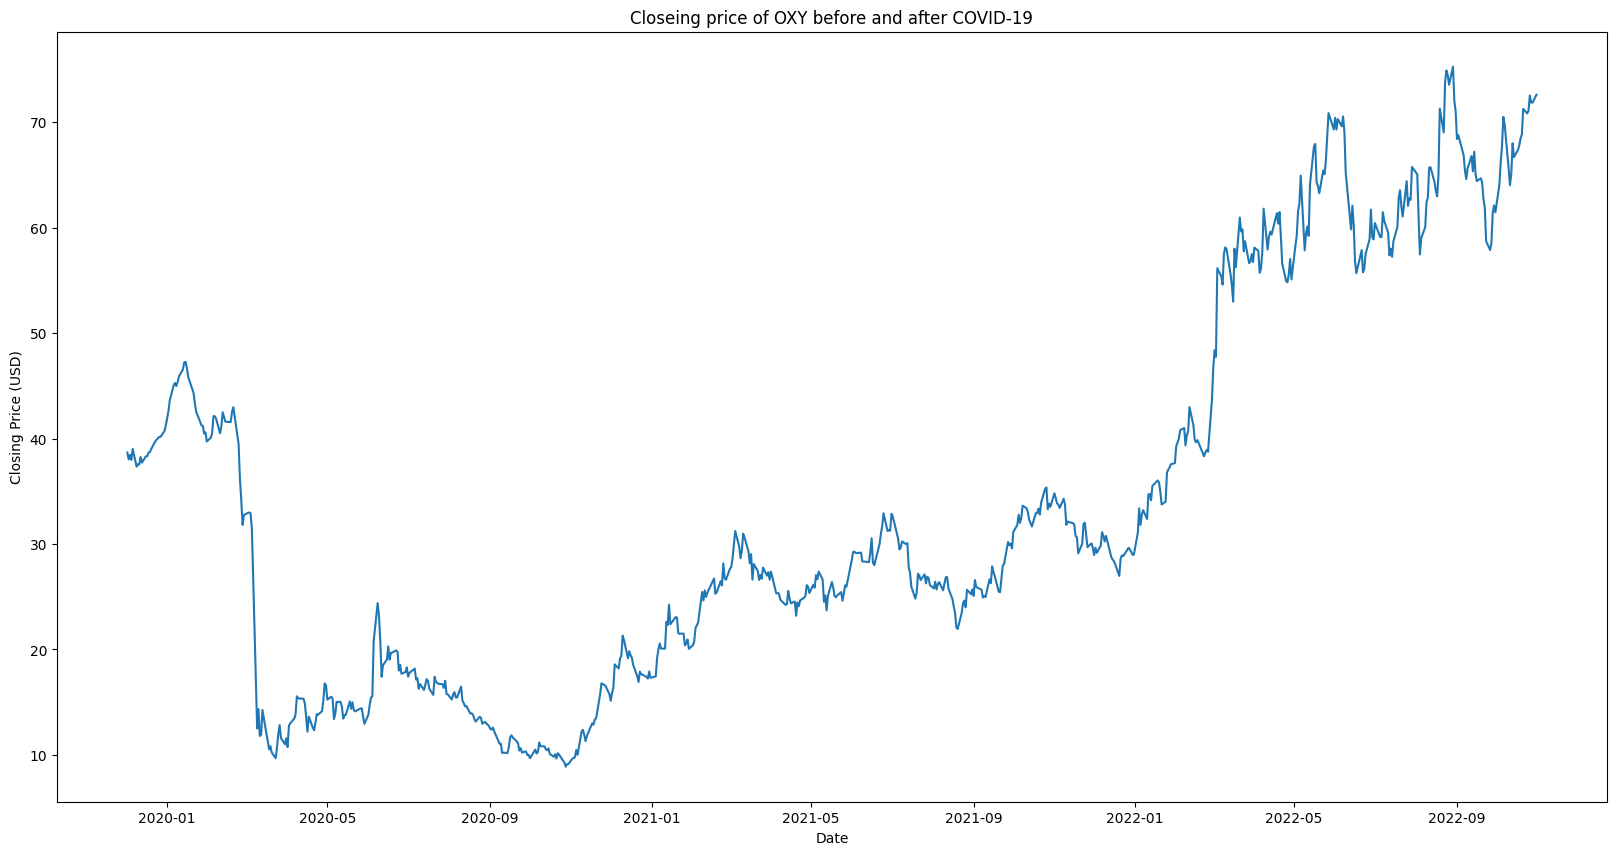

In [10]:
plt.figure(figsize = (20,10))
plt.title("Closeing price of OXY before and after COVID-19")
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

In [11]:
# Specifying Data for the Model

X = stock_data.iloc[:, 1:-1].values
y = stock_data.iloc[:, -1].values


In [12]:
# Data splitting (20% for testing, 80% for training)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [13]:
# Standard scaler

# We use the scaler mainly on the X_train and X_test because we want them to be as similar in range as possible.
# We don't care too much about the y which is our predictions

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [14]:
# Training our model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Making predictions on the test set

y_pred =  regressor.predict(X_test)
y_pred

array([10.23134112, 13.22991205, 38.2822023 , 45.9804689 , 29.43539557,
       29.35056322, 24.7057154 , 66.43801056, 31.05578703, 45.00115282,
       39.66596989, 27.27377913, 41.35481698, 16.46057886, 11.21439394,
       16.06121639, 64.40549176, 63.92091305, 28.58237859, 13.30392607,
       59.49676342, 70.59611284, 62.75225298, 16.93450439, 29.18801581,
       61.67392699, 11.32714236, 12.70847402, 64.06131361, 28.57844599,
       37.58507827, 12.9856058 , 59.06281456, 15.03761425, 26.13437759,
       31.20261648, 69.63138961, 55.93758828, 10.13402817, 26.9356608 ,
       32.90375581, 36.8207863 , 17.38253405, 26.13891289, 59.81133969,
       69.19247851, 26.23630798, 15.55205623, 32.62301954, 12.6424532 ,
       29.00664776, 56.6402857 , 34.04346972, 32.69650538, 11.15569897,
       26.4576121 , 27.40219477, 58.35334267, 56.55589424, 24.95318237,
       33.29195437, 26.63992532, 59.61121695, 42.9118424 , 29.4206835 ,
       16.66544389, 17.95898258, 22.23987654, 30.6126409 , 65.11

In [16]:
# Actual value and predicted value

# This here is actually a fancier way to showcase your predictions. y_pred was enough
act_pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
act_pred

,Actual Value,Predicted Value
0,10.220000,10.231341
1,13.130000,13.229912
2,39.009998,38.282202
3,46.669998,45.980469
4,29.500000,29.435396
...,...,...
142,56.150002,54.912069
143,75.260002,75.544465
144,17.469999,17.616216
145,28.950001,29.222341
